In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from __future__ import print_function

import random
import argparse
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import CosineAnnealingLR, MultiStepLR

In [ ]:
from python_utils import *

In [ ]:
import os
import time
import math
import random
from pathlib import Path

import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal
import tensorflow as tf  # for reading TFRecord Dataset
import tensorflow_datasets as tfds  # for making tf.data.Dataset to return numpy arrays
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm import tqdm

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

import jax
import jax.numpy as jnp
from jax import random
from jax import make_jaxpr
from jax.config import config
from jax import value_and_grad
from jax import grad, vmap, pmap, jit



np.random.seed(1234)
%config IPCompleter.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


In [ ]:
import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output
#@markdown <br><center><img src='https://mega.nz/favicon.ico?v=3' height="50" alt="MEGA-logo"/></center>
#@markdown <center><h2>Transfer from Mega to GDrive</h2></center><br>
HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
)
#@title MEGA public link download
URL = "https://mega.nz/folder/IdljkYDa#DNHwevurlUCDVcpDCoJhqA" #@param {type:"string"}
OUTPUT_PATH = "/content" #@param {type:"string"}
if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        


transfare()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
TRANSFERRING ||#################.......................||(156/377 MB:  41.47 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.48 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.48 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.48 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.47 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.51 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.50 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.54 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.53 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.57 %)  
TRANSFERRING ||#################.......................||(156/377 MB:  41.57 %)  
TRANSFERRING ||#####

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import requests
import io
import urllib.parse

BASE_URL = 'https://mega.nz/folder/0EsGXagR#4QnafpM3SWj8gNLFQ8rRPw'


def read_csv_from_web(file_name):
  url = urllib.parse.urljoin(BASE_URL, file_name)
  content = requests.get(url).content
  return pd.read_csv(io.StringIO(content.decode('utf-8')))


# Read in csv files.
train = pd.read_csv('/content/A.csv')
test = pd.read_csv('/content/B.csv')
sample_submission = pd.read_csv('/content/C.csv')

In [ ]:
train.head()

,Image_id,Label
0,id_02amazy34fgh2.jpg,1
1,id_02mh3w48pmyc9.jpg,0
2,id_02rpb463h9d3w.jpg,0
3,id_02wc3jeeao8ol.jpg,1
4,id_03t2hapb8wz8p.jpg,1


In [ ]:
test.head()

,Image_id
0,id_00exusbkgzw1b.jpg
1,id_03dqinf6w0znv.jpg
2,id_046yl0cxn3ybz.jpg
3,id_04athdtx2abyg.jpg
4,id_062aauf9e9jk0.jpg


In [ ]:
sample_submission.head()

,Image_id,Label
0,id_00exusbkgzw1b.jpg,0
1,id_03dqinf6w0znv.jpg,0
2,id_046yl0cxn3ybz.jpg,0
3,id_04athdtx2abyg.jpg,0
4,id_062aauf9e9jk0.jpg,0


In [ ]:
train.shape, test.shape, sample_submission.shape

((1619, 2), (1080, 1), (1080, 2))

In [ ]:
print(f"There are {train.Image_id.nunique()} unique Images in the train set.")

There are 1619 unique Images in the train set.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import copy
import os
import torch
from PIL import Image
from PIL import Image, ImageDraw
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
%matplotlib inline

In [ ]:
!pip install torchsummary

In [ ]:
train[train.duplicated(keep=False)]

,Image_id,Label


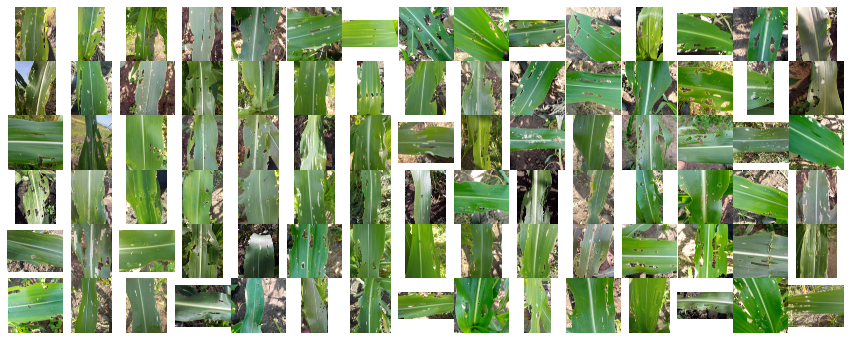

In [ ]:
imgpath ="/content/Images"
malignant = train.loc[train['Label']==1]['Image_id'].values # get the ids of malignant cases
normal = train.loc[train['Label']==0]['Image_id'].values # get the ids of the normal cases


nrows,ncols=6,15
fig,ax = plt.subplots(nrows,ncols,figsize=(15,6))
plt.subplots_adjust(wspace=0, hspace=0) 
for i,j in enumerate(malignant[:nrows*ncols]) :
    fname = os.path.join(imgpath ,j)
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    idcol.rectangle(((0,0),(95,95)),outline='red')
    plt.subplot(nrows, ncols, i+1) 
    plt.imshow(np.array(img))
    plt.axis('off')

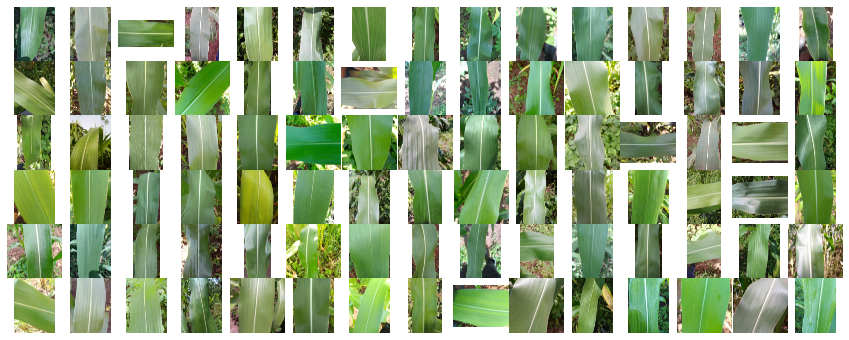

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplots_adjust(wspace=0, hspace=0)

nrows,ncols=6,15
for i,j in enumerate(normal[:nrows*ncols]):
    fname = os.path.join(imgpath ,j )
    img = Image.open(fname)
    idcol = ImageDraw.Draw(img)
    idcol.rectangle(((0,0),(95,95)),outline='green')
    plt.subplot(nrows, ncols, i+1) 
    plt.imshow(np.array(img))
    plt.axis('off')

In [ ]:
len(malignant)

809

In [ ]:
cdm_data=os.path.join('/content/','Images') 
file_names = os.listdir(cdm_data) 
file_train=[]
for i in range(0,809) :
  for j in range(809):
    if file_names[i]==malignant[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(809,2*809) :
  for j in range(809):
    if file_names[i]==malignant[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(2*809,3*809) :
  for j in range(809):
    if file_names[i]==malignant[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(3*809,3*809+272) :
  for j in range(809):
    if file_names[i]==malignant[j]  :
      file_train.append(file_names[i])

In [ ]:
len(file_train)

809

In [ ]:
for i in range(0,810) :
  for j in range(810):
    if file_names[i]==normal[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(810,2*810) :
  for j in range(810):
    if file_names[i]==normal[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(2*810,3*810) :
  for j in range(810):
    if file_names[i]==normal[j]  :
      file_train.append(file_names[i])

In [ ]:
for i in range(3*810,3*810+269) :
  for j in range(810):
    if file_names[i]==normal[j]  :
      file_train.append(file_names[i])

In [ ]:
len(file_train)

1619

In [ ]:

sample_submission['Label']

0       0
1       0
2       0
3       0
4       0
       ..
1075    0
1076    0
1077    0
1078    0
1079    0
Name: Label, Length: 1080, dtype: int64

In [ ]:
w = sample_submission.loc[sample_submission['Label']==0]['Image_id'].values

In [ ]:
cdm_data=os.path.join('/content/','Images') 
file_names = os.listdir(cdm_data) 
file_test=[]
for i in range(0,1080) :
  for j in range(1080):
    if file_names[i]==w[j]  :
      file_test.append(file_names[i])

In [ ]:

for i in range(1080,2*1080) :
  for j in range(1080):
    if file_names[i]==w[j]  :
      file_test.append(file_names[i])

In [ ]:
for i in range(2*1080,2*1080+539) :
  for j in range(1080):
    if file_names[i]==w[j]  :
      file_test.append(file_names[i])

In [ ]:
len(file_test)

1080

In [ ]:
# fix torch random seed
torch.manual_seed(0)

class pytorch_data(Dataset):
    
    def __init__(self, data_dir, transform,data_type='Images'):      
    
        # Get Image File Names
        cdm_data=os.path.join(data_dir,'Images')  # directory of files
        file_names = os.listdir(cdm_data) # get list of images in that directory
        self.full_filenames = [os.path.join(cdm_data, f) for f in file_train]   # get the full path to images
        # Get Labels
        labels_df=pd.read_csv('/content/A.csv')
        labels_df.set_index("Image_id", inplace=True) # set data frame index to id
        # obtained labels from df
        self.labels = [labels_df.loc[filename].Label for filename in file_train] 
        self.transform = transform
      
    def __len__(self):
        return len(self.full_filenames) # size of dataset
      
    def __getitem__(self, idx):
        # open image, apply transforms and return with label
        image = Image.open(self.full_filenames[idx])  # Open Image with PIL
        image = self.transform(image) # Apply Specific Transformation to Image
        return image, self.labels[idx]

In [ ]:
class pytorch_data88(Dataset):
    
    def __init__(self, data_dir, transform,data_type='Images'):      
    
        # Get Image File Names
        cdm_data=os.path.join(data_dir,'Images')  # directory of files
        file_names = os.listdir(cdm_data) # get list of images in that directory
        self.full_filenames = [os.path.join(cdm_data, f) for f in file_test]   # get the full path to images
        # Get Labels
        labels_df=pd.read_csv('/content/C.csv')
        labels_df.set_index("Image_id", inplace=True) # set data frame index to id
        # obtained labels from df
        self.labels = [labels_df.loc[filename].Label for filename in file_test] 
        self.transform = transform
      
    def __len__(self):
        return len(self.full_filenames) # size of dataset
      
    def __getitem__(self, idx):
        # open image, apply transforms and return with label
        image = Image.open(self.full_filenames[idx])  # Open Image with PIL
        image = self.transform(image) # Apply Specific Transformation to Image
        return image, self.labels[idx]

In [ ]:
# define transformation that converts a PIL image into PyTorch tensors.
import torchvision.transforms as transforms
data_transformer = transforms.Compose([transforms.ToTensor(),
                                       transforms.Resize((46,46))])

In [ ]:
# Define an object of the custom dataset for the train folder.
data_dir = '/content/'
img_dataset = pytorch_data(data_dir, data_transformer, 'Images') 

In [ ]:
data_dir = '/content/'
img_dataset88 = pytorch_data88(data_dir, data_transformer, 'Images') 

In [ ]:
img,label=img_dataset[10]
print(img.shape,torch.min(img),torch.max(img))

torch.Size([3, 46, 46]) tensor(0.) tensor(1.)


In [ ]:
img,label=img_dataset88[10]
print(img.shape,torch.min(img),torch.max(img))

torch.Size([3, 46, 46]) tensor(0.0034) tensor(1.)


In [ ]:
len_img=len(img_dataset)
len_train=int(0.8*len_img)
len_val=len_img-len_train

# Split Pytorch tensor
train_ts,val_ts=random_split(img_dataset,
                             [len_train,len_val]) # random split 80/20

print("train dataset size:", len(train_ts))
print("validation dataset size:", len(val_ts))

train dataset size: 1295
validation dataset size: 324


In [ ]:
ii=-1
for x,y in train_ts:
    print(x.shape,y)
    ii+=1
    if(ii>5):
        break

torch.Size([3, 46, 46]) 0
torch.Size([3, 46, 46]) 1
torch.Size([3, 46, 46]) 1
torch.Size([3, 46, 46]) 0
torch.Size([3, 46, 46]) 1
torch.Size([3, 46, 46]) 0
torch.Size([3, 46, 46]) 1


In [ ]:
import plotly.express as px

def plot_img(x,y):

    npimg = x.numpy() # convert tensor to numpy array
    npimg_tr=np.transpose(npimg, (1,2,0)) # Convert to H*W*C shape
    fig = px.imshow(npimg_tr)
    fig.update_layout(coloraxis_showscale=False,title=str(y_grid_train))
    fig.update_xaxes(showticklabels=False)
    fig.update_layout(template='plotly_white',height=200);fig.update_layout(margin={"r":0,"t":60,"l":0,"b":0})
    fig.update_layout(title={'text': str(y),'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
    
    fig.show()

image indices: [ 471  365  212  291  786  332 1141 1232]
torch.Size([3, 98, 194])



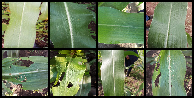

In [ ]:
import plotly.express as px

# Create grid of sample images 
grid_size=8
rnd_inds=np.random.randint(0,len(train_ts),grid_size)
print("image indices:",rnd_inds)

x_grid_train=[train_ts[i][0] for i in rnd_inds]
y_grid_train=[train_ts[i][1] for i in rnd_inds]

x_grid_train=utils.make_grid(x_grid_train, nrow=4, padding=2)
print(x_grid_train.shape)
    
plot_img(x_grid_train,y_grid_train)

image indices: [317  28 257 267 190 145 286 294]
torch.Size([3, 98, 194])



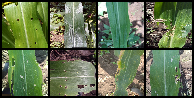

In [ ]:
grid_size=8
rnd_inds=np.random.randint(0,len(val_ts),grid_size)
print("image indices:",rnd_inds)
x_grid_val=[val_ts[i][0] for i in range(grid_size)]
y_grid_val=[val_ts[i][1] for i in range(grid_size)]

x_grid_val=utils.make_grid(x_grid_val, nrow=4, padding=2)
print(x_grid_val.shape)

plot_img(x_grid_val,y_grid_val)

image indices: [313  49 318 211 155 233 164  84]
torch.Size([3, 98, 194])



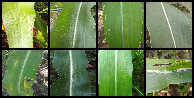

In [ ]:
grid_size=8
rnd_inds=np.random.randint(0,len(val_ts),grid_size)
print("image indices:",rnd_inds)
x_grid_val=[test_ts[i][0] for i in range(grid_size)]
y_grid_val=[test_ts[i][1] for i in range(grid_size)]

x_grid_val=utils.make_grid(x_grid_val, nrow=4, padding=2)
print(x_grid_val.shape)

plot_img(x_grid_val,y_grid_val)

In [ ]:
#tr_transf = transforms.Compose([
#     transforms.Resize((40,40)),
    #transforms.RandomHorizontalFlip(p=0.5), 
    #transforms.RandomVerticalFlip(p=0.5),  
    #transforms.RandomRotation(45),         
#     transforms.RandomResizedCrop(50,scale=(0.8,1.0),ratio=(1.0,1.0)),
    #transforms.ToTensor()])
tr_transf=transforms.AutoAugment()

In [ ]:
# For the validation dataset, we don't need any augmentation; simply convert images into tensors
val_transf = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# After defining the transformations, overwrite the transform functions of train_ts, val_ts
train_ts.transform=tr_transf
val_ts.transform=val_transf

In [ ]:
# For the validation dataset, we don't need any augmentation; simply convert images into tensors
test_transf = transforms.Compose([transforms.ToTensor(),
                                       transforms.Resize((46,46))])

test_ts=img_dataset88
# After defining the transformations, overwrite the transform functions of train_ts, val_ts
test_ts.transform=test_transf

In [ ]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ts, batch_size=40, shuffle=True,pin_memory=True,num_workers=2)
val_dl = DataLoader(val_ts, batch_size=40, shuffle=False,pin_memory=True,num_workers=2)

In [ ]:
test_dl = DataLoader(img_dataset88, batch_size=40, shuffle=False,pin_memory=True,num_workers=2)

In [ ]:
for x,y in train_dl:
    print(x.shape,y)
    break

torch.Size([40, 3, 46, 46]) tensor([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])


In [ ]:
# Function to calculate the output size of a CNN layer
# before making it an input into the linear layer

def findConv2dOutShape(hin,win,conv,pool=2):
    # get conv arguments
    kernel_size=conv.kernel_size
    stride=conv.stride
    padding=conv.padding
    dilation=conv.dilation

    hout=np.floor((hin+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    wout=np.floor((win+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)

    if pool:
        hout/=pool
        wout/=pool
    return int(hout),int(wout)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    
    # Network Initialisation
    def __init__(self, params):
        
        super(Network, self).__init__()
    
        Cin,Hin,Win=params["shape_in"]
        init_f=params["initial_filters"] 
        num_fc1=params["num_fc1"]  
        num_classes=params["num_classes"] 
        self.dropout_rate=params["dropout_rate"] 
        
        # Convolution Layers
        self.conv1 = nn.Conv2d(Cin, init_f, kernel_size=3)
        h,w=findConv2dOutShape(Hin,Win,self.conv1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv2)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv3)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3)
        h,w=findConv2dOutShape(h,w,self.conv4)
        
        # compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1 = nn.Linear(self.num_flatten, num_fc1)
        self.fc2 = nn.Linear(num_fc1, num_classes)

    def forward(self,X):
        
        # Convolution & Pool Layers
        X = F.relu(self.conv1(X)); X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X)); X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X));X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X));X = F.max_pool2d(X, 2, 2)

        X = X.view(-1, self.num_flatten)
        X = F.relu(self.fc1(X))
        X=F.dropout(X, self.dropout_rate)
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

# Neural Network Predefined Parameters
params_model={
        "shape_in": (3,46,46), 
        "initial_filters": 8,    
        "num_fc1": 100,
        "dropout_rate": 0.25,
        "num_classes": 2}

# Create instantiation of Network class
cnn_model = Network(params_model)

# define computation hardware approach (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else  'cpu')
model = cnn_model.to(device)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else  'cpu')

In [ ]:
#loss_func = nn.NLLLoss(reduction="sum")
#loss_func=nn.CrossEntropyLoss()


In [ ]:
from torch import optim
#params79=custom_weight_decay(resnet,0.01)
opt = optim.Adam(model50.parameters(), lr=0.005)
#opt = optim.Adam(params79, lr=3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=10,verbose=1)

In [ ]:
''' Helper Functions'''

# Function to get the learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

# Function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):
    
    loss = loss_func(output, target) # get loss
    pred = output.argmax(dim=1, keepdim=True) # Get Output Class
    metric_b=pred.eq(target.view_as(pred)).sum().item() # get performance metric
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        

    return loss.item(), metric_b
def loss_epoch(model,loss_func,dataset_dl,check=False,opt=None):
    
    run_loss=0.0 
    t_metric=0.0
    len_data=len(dataset_dl.dataset)

    # internal loop over dataset
    for xb, yb in dataset_dl:
        # move batch to device
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb) # get model output
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt) # get loss per batch
        run_loss+=loss_b        # update running loss

        if metric_b is not None: # update running metric
            t_metric+=metric_b
        # break the loop in case of sanity check
        if check is True:
            break
    
    loss=run_loss/float(len_data)  # average loss value
    metric=t_metric/float(len_data) # average metric value
    
    return loss, metric

In [ ]:
def train_val(model, params,verbose=False):
    
    # Get the parameters
    epochs=params["epochs"]
    loss_func=params["f_loss"]
    opt=params["optimiser"]
    train_dl=params["train"]
    val_dl=params["val"]
    check=params["check"]
    lr_scheduler=params["lr_change"]
    weight_path=params["weight_path"]
    
    loss_history={"train": [],"val": []} # history of loss values in each epoch
    metric_history={"train": [],"val": []} # histroy of metric values in each epoch
    best_model_wts = copy.deepcopy(model.state_dict()) # a deep copy of weights for the best performing model
    best_loss=float('inf') # initialize best loss to a large value
    
    # main loop
    for epoch in range(epochs):
        
        ''' Get the Learning Rate '''
        current_lr=get_lr(opt)
        #if(verbose):
        print('Epoch {}/{}, current lr={}'.format(epoch, epochs - 1, current_lr))
        
        ''' Train the Model on the Training Set '''
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,check,opt)

        ''' Collect loss and metric for training dataset ''' 
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        ''' Evaluate model on validation dataset '''
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,check)
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), weight_path)
            #if(verbose):
            print("Copied best model weights!")
        
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        # learning rate schedule
        lr_scheduler.step(val_loss)
        
        if current_lr != get_lr(opt):
            #if(verbose):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)
            print(f"get_lr(opt):{get_lr(opt):.6f}",f"current_lr:{current_lr:.6f}")

        #if(verbose):
        print(f"train loss: {train_loss:.6f}, dev loss: {val_loss:.6f}, accuracy: {100*val_metric:.2f}")
        print("-"*10) 

    # load best model weights
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

In [ ]:
params_train={
 "train": train_dl,"val": val_dl,
 "epochs": 50,
 "optimiser": optim.Adam(cnn_model.parameters(),
                         lr=3e-4),
 "lr_change": ReduceLROnPlateau(opt,
                                mode='min',
                                factor=0.5,
                                patience=10,
                                verbose=0),
 "f_loss": nn.NLLLoss(reduction="sum"),
 "weight_path": "weights.pt",
    "check": False, 
}

''' Actual Train / Evaluation of CNN Model '''
# train and validate the model
cnn_model,loss_hist,metric_hist=train_val(cnn_model,params_train)

In [ ]:
from torchvision import models
resnet=models.resnet18(pretrained=True)
for param in resnet.parameters() :
  param.requires_grad = False
num_fltrs=resnet.fc.in_features
resnet.fc=nn.Sequential((nn.Linear(num_fltrs,2)))
model=resnet.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
def custom_weight_decay(model,l2_value,skiplist=[]):
  decay, no_decay= [], []
  for name, param in model.named_parameters():
    if not param.requires_grad: continue
  if len(param.shape) ==1 or name in skip_list:
      no_decay.append(param)
  else: decay.append(param)
  return[{'params':no_decay,'weight_decay':0.},{'params':decay,'weight_decay':l2_value}]

In [ ]:
from torchvision import models
for param in model50.parameters() :
  param.requires_grad = False
num_fltrs=model50.fc.in_features
model50.fc=nn.Sequential((nn.Linear(num_fltrs,2)))
model=model50.to(device)

In [ ]:
params_train={
 "train": train_dl,"val": val_dl,
 "epochs": 100,
 "optimiser": optim.Adam(model50.parameters(),lr=0.05),
 "lr_change": ReduceLROnPlateau(opt,mode='min',factor=0.5,patience=10,verbose=0),
 "f_loss": nn.CrossEntropyLoss(),#nn.NLLLoss(reduction="sum"),
 "weight_path": "weights.pt",
    "check": False, 
}

''' Actual Train / Evaluation of CNN Model '''
# train and validate the model
model50,loss_hist,metric_hist=train_val(model50,params_train)

Epoch 0/99, current lr=0.05
Copied best model weights!
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.128995, dev loss: 0.078944, accuracy: 79.94
----------
Epoch 1/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.040962, dev loss: 0.091802, accuracy: 77.16
----------
Epoch 2/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.043455, dev loss: 0.108471, accuracy: 72.53
----------
Epoch 3/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.047677, dev loss: 0.096629, accuracy: 76.54
----------
Epoch 4/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.060428, dev loss: 0.155688, accuracy: 71.91
----------
Epoch 5/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.106984, dev loss: 0.243417, accuracy: 68.21
----------
Epoch 6/99, current lr=0.05
get_lr(opt):0.050000 current_lr:0.050000
train loss: 0.057654, dev loss: 0.117387, accuracy: 76.54
----------
Epoch 7

In [ ]:
# Train-Validation Progress
epochs=params_train["epochs"]

fig = make_subplots(rows=1, cols=2,subplot_titles=['lost_hist','metric_hist'])
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=loss_hist["train"],name='loss_hist["train"]'),row=1, col=1)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=loss_hist["val"],name='loss_hist["val"]'),row=1, col=1)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=metric_hist["train"],name='metric_hist["train"]'),row=1, col=2)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=metric_hist["val"],name='metric_hist["val"]'),row=1, col=2)
fig.update_layout(template='plotly_white');fig.update_layout(margin={"r":0,"t":60,"l":0,"b":0},height=300)
fig.show()

In [ ]:
# Train-Validation Progress
epochs=params_train["epochs"]

fig = make_subplots(rows=1, cols=2,subplot_titles=['lost_hist','metric_hist'])
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=loss_hist["train"],name='loss_hist["train"]'),row=1, col=1)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=loss_hist["val"],name='loss_hist["val"]'),row=1, col=1)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=metric_hist["train"],name='metric_hist["train"]'),row=1, col=2)
fig.add_trace(go.Scatter(x=[*range(1,epochs+1)], y=metric_hist["val"],name='metric_hist["val"]'),row=1, col=2)
fig.update_layout(template='plotly_white');fig.update_layout(margin={"r":0,"t":60,"l":0,"b":0},height=300)
fig.show()

In [ ]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_dl:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model on test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


Test Accuracy of the model on test images: 78.08641975308642 %


In [ ]:
model.eval()

preds = []
for batch_i, (data, target) in enumerate(test_dl):
    data, target = data.cuda(),target.cuda()
    output = model(data)

    pr = output[:,1].detach().cpu().numpy()
    for i in pr:
        preds.append(i)
sample_submission.shape, len(preds)
sample_submission['Label'] = preds

In [ ]:
sample_submission.to_csv('s.csv', index=False)
from google.colab import files
files.download('s.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>